In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def buffons_needle_simulation(b=0.7, s=1.0, N=100000):
    # Random distances from center to nearest line: uniform in [0, s/2]
    d = np.random.uniform(0, s / 2, N)
    
    # Random angles: uniform in [0, pi/2] due to symmetry
    theta = np.random.uniform(0, np.pi / 2, N)
    
    # Check intersection: if (b/2) * sin(theta) >= d
    intersects = (b / 2) * np.sin(theta) >= d
    
    # Estimate probability of intersection
    P = np.mean(intersects)
    
    # Estimate pi from the formula
    pi_estimate = (2 * b) / (s * P)
    
    return P, pi_estimate

# Run the simulation
P, pi_estimate = buffons_needle_simulation()
print(f"Estimated Probability P: {P}")
print(f"Estimated π: {pi_estimate}")


Estimated Probability P: 0.44374
Estimated π: 3.155000676071573


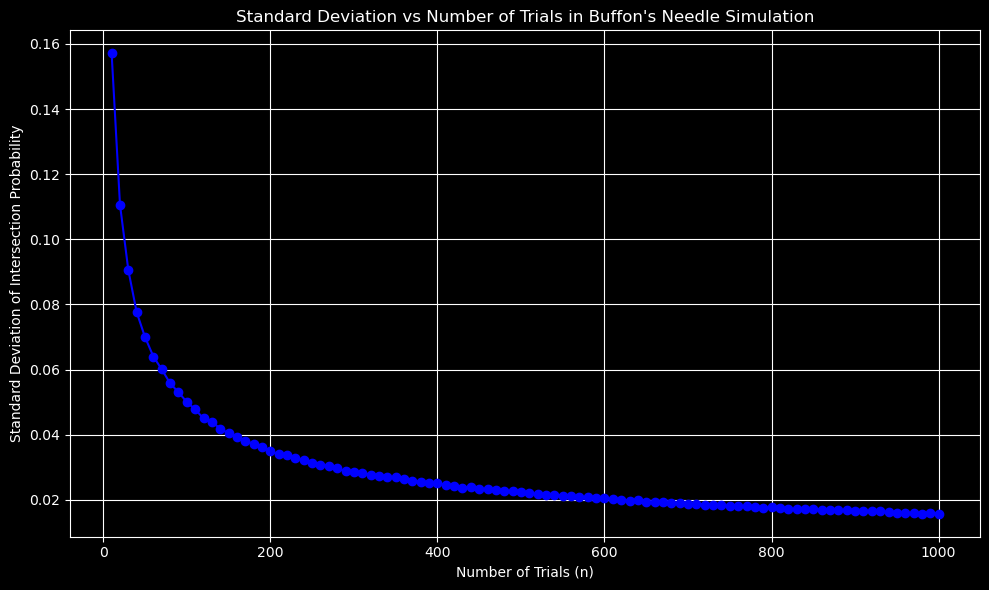

In [2]:
def buffons_needle_std_dev(b=0.7, s=1.0, repetitions=10000):
    trial_counts = np.arange(10, 1001, 10)  # n in {10, 20, ..., 1000}
    std_devs = []

    for n in trial_counts:
        intersection_probs = []
        for _ in range(repetitions):
            d = np.random.uniform(0, s / 2, n)
            theta = np.random.uniform(0, np.pi / 2, n)
            intersects = (b / 2) * np.sin(theta) >= d
            P = np.mean(intersects)
            intersection_probs.append(P)

        std_dev = np.std(intersection_probs)
        std_devs.append(std_dev)

    return trial_counts, std_devs


trial_counts, std_devs = buffons_needle_std_dev()

plt.figure(figsize=(10, 6))
plt.plot(trial_counts, std_devs, color='blue', marker='o', linestyle='-')
plt.xlabel("Number of Trials (n)")
plt.ylabel("Standard Deviation of Intersection Probability")
plt.title("Standard Deviation vs Number of Trials in Buffon's Needle Simulation")
plt.grid(True)
plt.tight_layout()
plt.show()


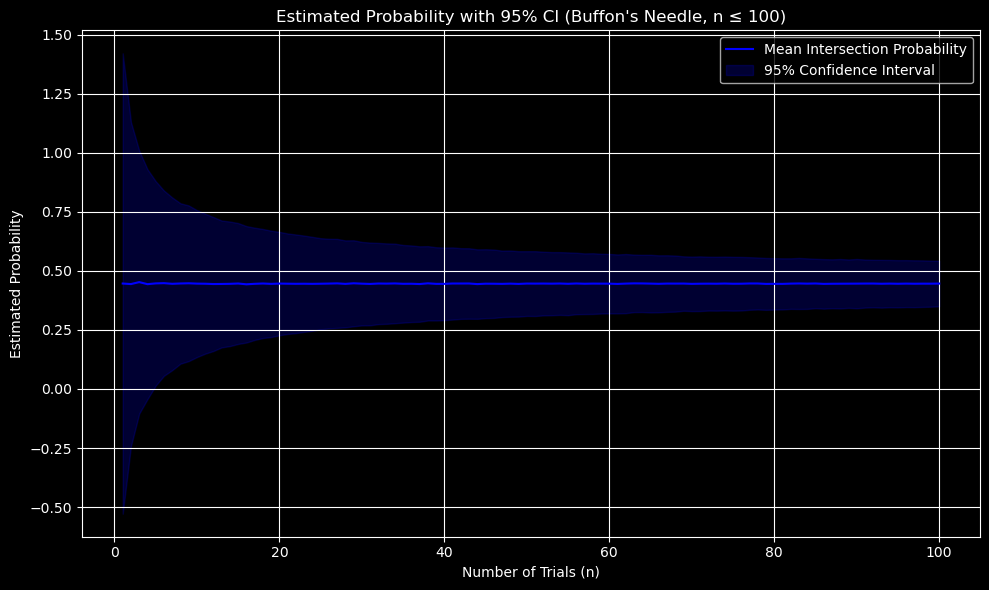

In [3]:
# For n from 1 to 100, simulate many experiments and track the probability over trials
def buffons_needle_probability_with_ci(b=0.7, s=1.0, max_trials=100, repetitions=10000, confidence=0.95):
    from scipy.stats import norm

    z = norm.ppf(0.5 + confidence / 2)  # z-value for 95% CI
    trial_range = np.arange(1, max_trials + 1)
    
    # Store mean probabilities and confidence intervals
    mean_probs = []
    lower_bounds = []
    upper_bounds = []

    for n in trial_range:
        probs = []
        for _ in range(repetitions):
            d = np.random.uniform(0, s / 2, n)
            theta = np.random.uniform(0, np.pi / 2, n)
            intersects = (b / 2) * np.sin(theta) >= d
            P = np.mean(intersects)
            probs.append(P)

        mean_P = np.mean(probs)
        std_P = np.std(probs)
        margin = z * std_P

        mean_probs.append(mean_P)
        lower_bounds.append(mean_P - margin)
        upper_bounds.append(mean_P + margin)

    return trial_range, mean_probs, lower_bounds, upper_bounds

# Run the function
trial_range, mean_probs, lower_bounds, upper_bounds = buffons_needle_probability_with_ci()

# Plotting the probabilities with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(trial_range, mean_probs, label="Mean Intersection Probability", color="blue")
plt.fill_between(trial_range, lower_bounds, upper_bounds, color='blue', alpha=0.2, label="95% Confidence Interval")
plt.xlabel("Number of Trials (n)")
plt.ylabel("Estimated Probability")
plt.title("Estimated Probability with 95% CI (Buffon's Needle, n ≤ 100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


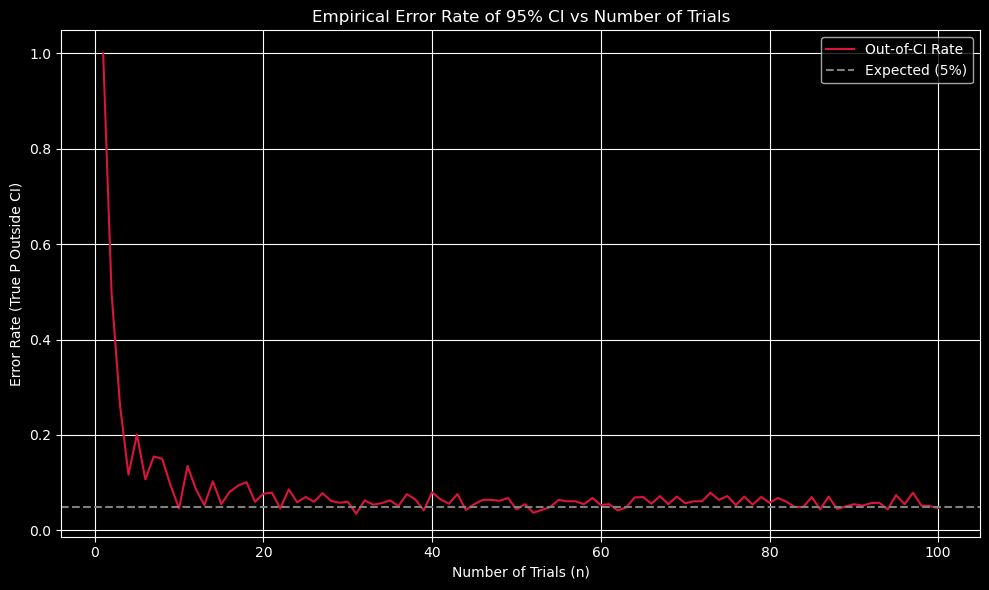

In [4]:

def buffons_needle_ci_coverage(b=0.7, s=1.0, max_n=100, repetitions=1000, confidence=0.95):
    z = norm.ppf(0.5 + confidence / 2)
    true_P = (2 * b) / (s * np.pi)  # Theoretical intersection probability

    ns = np.arange(1, max_n + 1)
    error_rates = []

    for n in ns:
        outside_count = 0

        for _ in range(repetitions):
            d = np.random.uniform(0, s / 2, n)
            theta = np.random.uniform(0, np.pi / 2, n)
            intersects = (b / 2) * np.sin(theta) >= d
            P_hat = np.mean(intersects)
            std_hat = np.std(intersects) / np.sqrt(n)
            margin = z * std_hat

            lower = P_hat - margin
            upper = P_hat + margin

            if true_P < lower or true_P > upper:
                outside_count += 1

        error_rate = outside_count / repetitions
        error_rates.append(error_rate)

    return ns, error_rates

# Run the simulation
ns, error_rates = buffons_needle_ci_coverage()

# Plot the ratio of experiments where the true probability is outside the 95% CI
plt.figure(figsize=(10, 6))
plt.plot(ns, error_rates, label="Out-of-CI Rate", color="crimson")
plt.axhline(y=0.05, color='gray', linestyle='--', label="Expected (5%)")
plt.xlabel("Number of Trials (n)")
plt.ylabel("Error Rate (True P Outside CI)")
plt.title("Empirical Error Rate of 95% CI vs Number of Trials")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()